<a href="https://colab.research.google.com/github/SaulNunez/AprendeMate/blob/master/IntroML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required modules and load data file

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
from google.colab import drive
drive.mount("/content/drive")

fruits = pd.read_table('/content/drive/My Drive/fruit_data_with_colors.txt')

Mounted at /content/drive


In [10]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [11]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [12]:
from matplotlib import cm

x = fruits[['height', 'width']]
y = fruits['fruit_label']
x_train, x_test, y_train, y_test =  train_test_split(x, y, random_state=0)

x.head()

,height,width
0,7.3,8.4
1,6.8,8.0
2,7.2,7.4
3,4.7,6.2
4,4.6,6.0


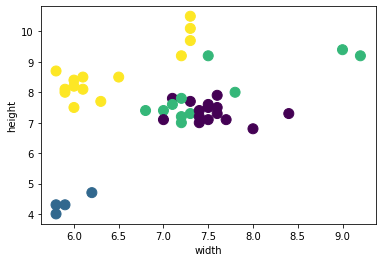

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_train['width'], x_train['height'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [15]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Estimate the accuracy of the classifier on future data, using the test data

In [16]:
knn.score(x_test, y_test)

0.6

In [17]:
fruit_prediction = knn.predict([[6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'apple'

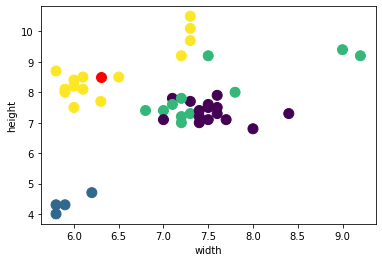

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_train['width'], x_train['height'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.scatter(6.3, 8.5, c="r",marker='o', s=100)

plt.show()

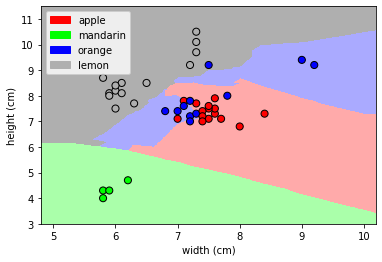

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.patches
 
def plot_fruit_knn(X, y, n_neighbors, weights):
    if isinstance(X, (pd.DataFrame,)):
        X_mat = X[['width', 'height']].to_numpy()
        y_mat = y.to_numpy()
    elif isinstance(X, (np.ndarray,)):
        # When X was scaled is already a matrix
        X_mat = X_mat[:, :2]
        y_mat = y.to_numpy()
        print(X_mat)
 
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
 
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
 
    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
 
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
 
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
 
    patch0 = matplotlib.patches.Patch(color='#FF0000', label='apple')
    patch1 = matplotlib.patches.Patch(color='#00FF00', label='mandarin')
    patch2 = matplotlib.patches.Patch(color='#0000FF', label='orange')
    patch3 = matplotlib.patches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
 
    plt.xlabel('width (cm)')
    plt.ylabel('height (cm)')
 
    plt.show()



plot_fruit_knn(x_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors